In [3]:
from drlqap.qap import GraphAssignmentProblem
from drlqap.evaluate import random_assignment
import numpy as np
import matplotlib.pyplot as plt
from drlqap.simplesolver import solve_qap_backtracking

In [4]:
%cd evaluation/

/media/windows/Users/Tim/Documents/Uni/thesis/repo/evaluation


In [5]:
with open("../qapdata/testgraph.dat", "r") as f:
    qap = GraphAssignmentProblem.from_qaplib_string(f.read())

In [6]:
n = qap.size
counts = np.zeros((n,n))
sums = np.zeros((n,n))

samples = 10000
for _ in range(samples):
    assignment = random_assignment(qap)
    value = qap.compute_value(assignment)
    for i,j in enumerate(assignment):
        counts[i,j] += 1
        sums[i,j] += value

In [7]:
averages = sums / counts

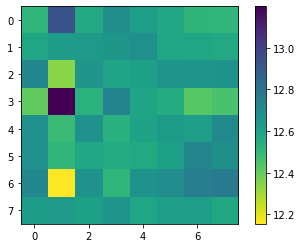

In [8]:
%matplotlib inline
plt.imshow(averages, cmap=plt.get_cmap("viridis_r"))
plt.colorbar()

In [9]:
optimal_value, optimal_assignment = solve_qap_backtracking(qap)

In [10]:
optimal_value

tensor(9.3004)

In [11]:
optimal_assignment

[7, 6, 4, 0, 2, 3, 1, 5]

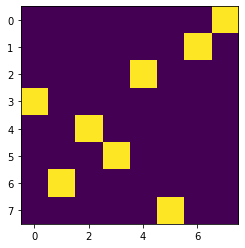

In [12]:
plt.imshow(np.eye(qap.size)[optimal_assignment])

In [13]:
qap.compute_value([7, 0, 3, 6, 5, 4, 1, 2])

tensor(9.7621)

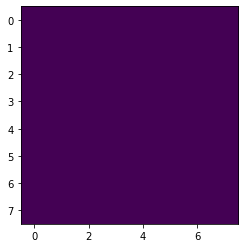

In [14]:
plt.imshow(qap.linear_costs)

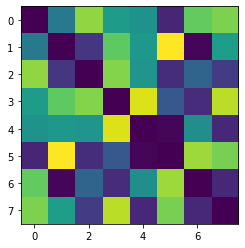

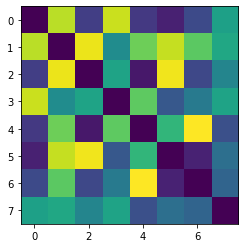

In [15]:
plt.imshow(qap.A)
plt.show()
plt.imshow(qap.B)
plt.show()

In [16]:
qap.A.sum(dim=1)

tensor([3.6116, 3.1144, 2.6970, 3.9665, 2.8606, 2.8926, 2.4441, 3.1390])

In [17]:
qap.B.sum(dim=1)

tensor([2.9996, 5.2939, 3.3882, 3.9307, 3.5987, 3.3150, 2.9597, 3.0757])

In [18]:
qap.A

tensor([[0.0000, 0.3678, 0.7587, 0.4983, 0.4687, 0.0987, 0.6909, 0.7284],
        [0.3678, 0.0000, 0.1449, 0.6844, 0.4866, 0.9095, 0.0160, 0.5051],
        [0.7587, 0.1449, 0.0000, 0.7423, 0.4760, 0.1199, 0.2920, 0.1633],
        [0.4983, 0.6844, 0.7423, 0.0000, 0.8614, 0.2503, 0.1149, 0.8149],
        [0.4687, 0.4866, 0.4760, 0.8614, 0.0000, 0.0150, 0.4502, 0.1026],
        [0.0987, 0.9095, 0.1199, 0.2503, 0.0150, 0.0000, 0.7774, 0.7218],
        [0.6909, 0.0160, 0.2920, 0.1149, 0.4502, 0.7774, 0.0000, 0.1028],
        [0.7284, 0.5051, 0.1633, 0.8149, 0.1026, 0.7218, 0.1028, 0.0000]])

In [34]:
import importlib
import drlqap.nn

In [37]:
importlib.reload(drlqap.nn)
drlqap.nn.edge_histogram_embeddings(qap.A, 8)

tensor([-1.0000,  0.1137,  0.2274,  0.3411,  0.4547,  0.5684,  0.6821,  0.7958]) tensor([[0, 3, 6, 4, 4, 0, 6, 6],
        [3, 0, 1, 6, 4, 7, 0, 4],
        [6, 1, 0, 6, 4, 1, 2, 1],
        [4, 6, 6, 0, 7, 2, 1, 7],
        [4, 4, 4, 7, 0, 0, 3, 0],
        [0, 7, 1, 2, 0, 0, 6, 6],
        [6, 0, 2, 1, 3, 6, 0, 0],
        [6, 4, 1, 7, 0, 6, 0, 0]]) 8


tensor([[[1, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 0, 0],
         [1, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 0, 0, 1, 0]],

        [[0, 0, 0, 1, 0, 0, 0, 0],
         [1, 0, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 1, 0],
         [0, 1, 0, 0, 0, 0, 0, 0],
         [1, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 1, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 0, 0, 1, 0],
         [1, 0, 0, 0, 0, 0, 0, 0],
         [0, 0

In [34]:
import torch
step=0.9/8
print(step)
range=torch.arange(0.0, 0.9 + step/2, step=step).reshape(1,1,-1)
print(range)
print(range+step)

0.1125
tensor([[[0.0000, 0.1125, 0.2250, 0.3375, 0.4500, 0.5625, 0.6750, 0.7875,
          0.9000]]])
tensor([[[0.1125, 0.2250, 0.3375, 0.4500, 0.5625, 0.6750, 0.7875, 0.9000,
          1.0125]]])
